In [152]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
df=pd.read_csv('milk.csv')
df.head()

,Month,Monthly milk production (pounds per cow)
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [153]:
de=df.rename(columns={'Monthly milk production (pounds per cow)':'Milk production'})

In [154]:
de=de.rename(columns={'Milk production': 'Milk_Production'})

In [155]:
df.info

<bound method DataFrame.info of        Month  Monthly milk production (pounds per cow)
0    1962-01                                       589
1    1962-02                                       561
2    1962-03                                       640
3    1962-04                                       656
4    1962-05                                       727
..       ...                                       ...
163  1975-08                                       858
164  1975-09                                       817
165  1975-10                                       827
166  1975-11                                       797
167  1975-12                                       843

[168 rows x 2 columns]>

In [156]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Month            168 non-null    object
 1   Milk_Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [157]:
de

,Month,Milk_Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


In [158]:
df.describe

<bound method NDFrame.describe of        Month  Monthly milk production (pounds per cow)
0    1962-01                                       589
1    1962-02                                       561
2    1962-03                                       640
3    1962-04                                       656
4    1962-05                                       727
..       ...                                       ...
163  1975-08                                       858
164  1975-09                                       817
165  1975-10                                       827
166  1975-11                                       797
167  1975-12                                       843

[168 rows x 2 columns]>

In [159]:
de.dtypes

Month              object
Milk_Production     int64
dtype: object

In [160]:
de['Month'] = pd.to_datetime(de['Month'])

In [161]:
de.dtypes

Month              datetime64[ns]
Milk_Production             int64
dtype: object

In [162]:
de=de.set_index('Month')

In [163]:
de

,Milk_Production
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


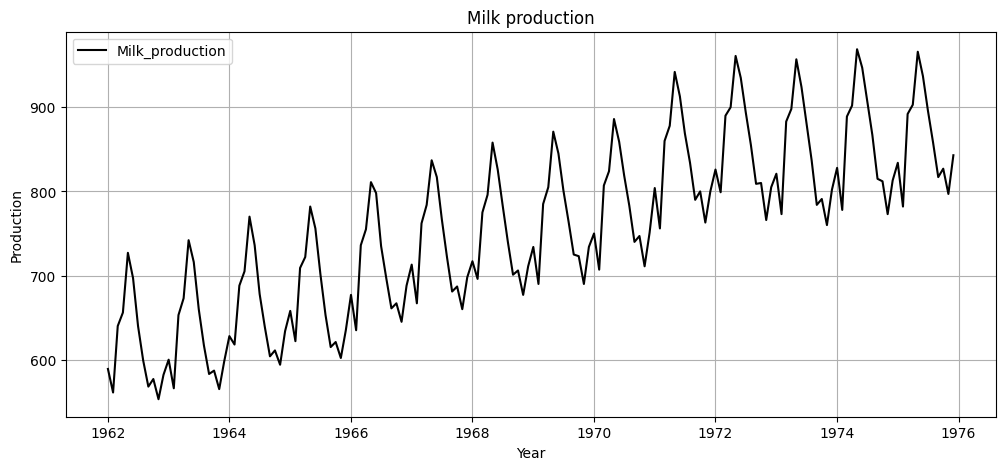

In [164]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(de,label="Milk_production", color='black')
plt.xlabel("Year")
plt.ylabel("Production")
plt.title("Milk production")
plt.legend()
plt.grid()
plt.show()

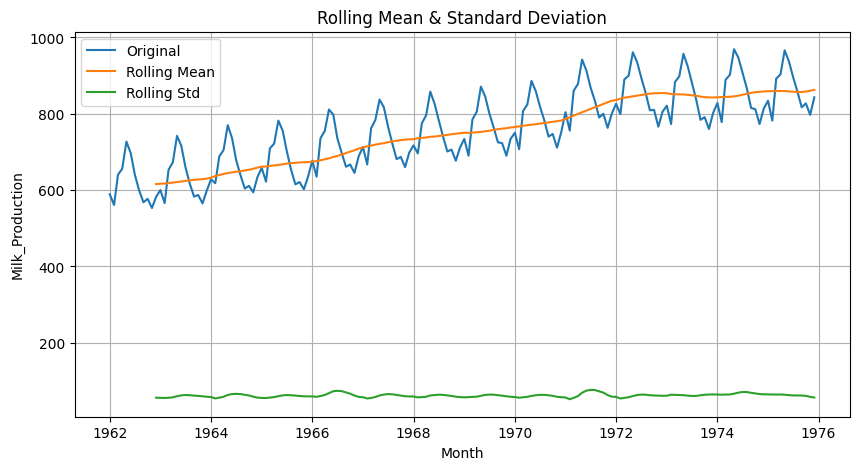

In [165]:
import seaborn as sns
de['rollmean'] = de['Milk_Production'].rolling(window=12).mean()
de['rollstd'] = de['Milk_Production'].rolling(window=12).std()

plt.figure(figsize=(10,5))
sns.lineplot(data=de, x=de.index, y='Milk_Production', label='Original')
sns.lineplot(data=de, x=de.index, y='rollmean', label='Rolling Mean')  
sns.lineplot(data=de, x=de.index, y='rollstd', label='Rolling Std')    
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

![Stationarity Test](stationarity.png)

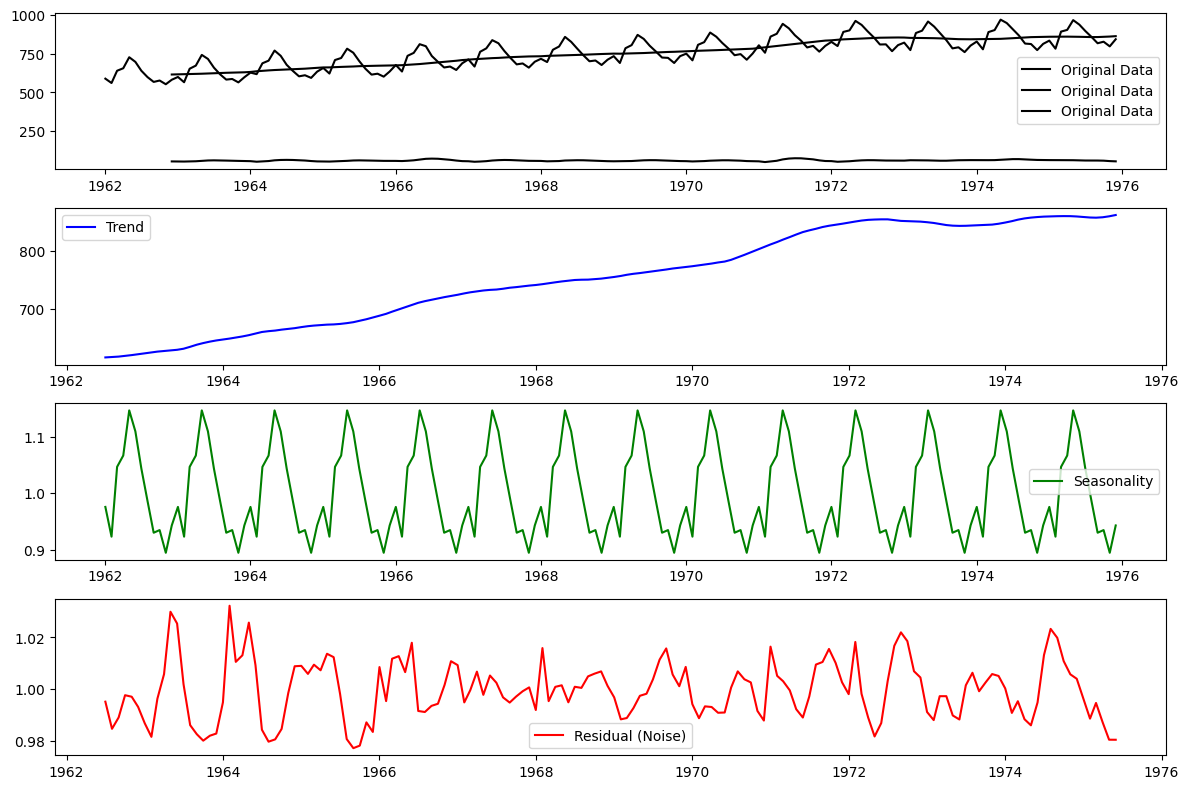

In [167]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result=seasonal_decompose(de['Milk_Production'],model='multiplicative',period=12)

# Plot components
plt.figure(figsize=(12,8))
plt.subplot(4,1,1)
plt.plot(de,label="Original Data", color="black")
plt.legend()

plt.subplot(4,1,2)
plt.plot(result.trend, label="Trend", color="blue")
plt.legend()

plt.subplot(4,1,3)
plt.plot(result.seasonal, label="Seasonality", color="green")
plt.legend()

plt.subplot(4,1,4)
plt.plot(result.resid, label="Residual (Noise)", color="red")
plt.legend()
plt.tight_layout()
plt.show()

![Stationarity Check](station.png)

In [169]:
# Make data stationary using time shift Method

# Create shift and difference columns
de['shift'] = de['Milk_Production'].shift(1)
de['shiftDiff'] = de['Milk_Production'] - de['shift']

de.head()

,Milk_Production,rollmean,rollstd,shift,shiftDiff
Month,,,,,
1962-01-01,589,NaN,NaN,NaN,NaN
1962-02-01,561,NaN,NaN,589.0,-28.0
1962-03-01,640,NaN,NaN,561.0,79.0
1962-04-01,656,NaN,NaN,640.0,16.0
1962-05-01,727,NaN,NaN,656.0,71.0


In [170]:
# Drop NaN values caused by shifting
de_cleaned = de.dropna()

# Step 3: Calculate rolling mean and std for 12-month window
de_cleaned['rollMean'] = de_cleaned['shiftDiff'].rolling(window=12).mean()
de_cleaned['rollStd'] = de_cleaned['shiftDiff'].rolling(window=12).std()

de_cleaned.head(15)

,Milk_Production,rollmean,rollstd,shift,shiftDiff,rollMean,rollStd
Month,,,,,,,
1962-12-01,582,615.750000,56.105623,553.0,29.0,NaN,NaN
1963-01-01,600,616.666667,55.717360,582.0,18.0,NaN,NaN
1963-02-01,566,617.083333,55.280209,600.0,-34.0,NaN,NaN
1963-03-01,653,618.166667,55.894110,566.0,87.0,NaN,NaN
1963-04-01,673,619.583333,57.141703,653.0,20.0,NaN,NaN
1963-05-01,742,620.833333,59.807013,673.0,69.0,NaN,NaN
1963-06-01,716,622.416667,62.209994,742.0,-26.0,NaN,NaN
1963-07-01,660,624.083333,62.986952,716.0,-56.0,NaN,NaN
1963-08-01,617,625.583333,62.548103,660.0,-43.0,NaN,NaN


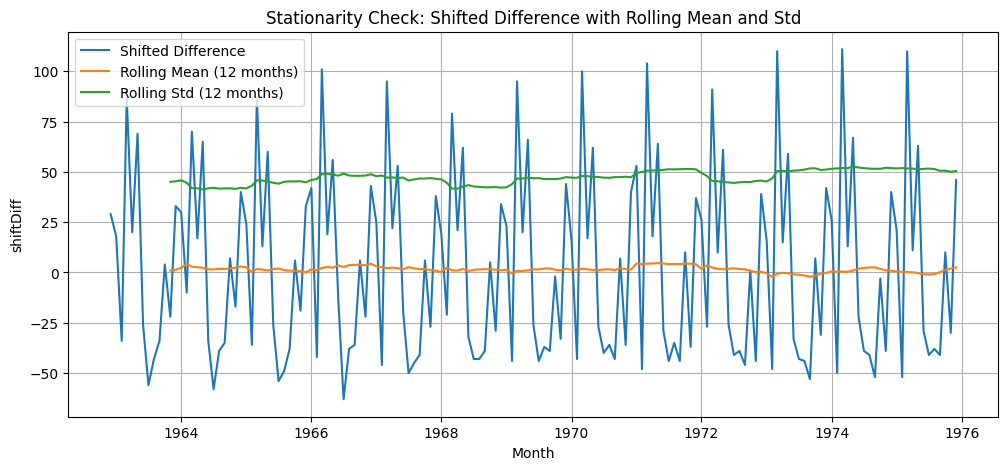

In [171]:
# Plot the data
plt.figure(figsize=(12, 5))
sns.lineplot(x=de_cleaned.index, y=de_cleaned['shiftDiff'], label='Shifted Difference')
sns.lineplot(x=de_cleaned.index, y=de_cleaned['rollMean'], label='Rolling Mean (12 months)')
sns.lineplot(x=de_cleaned.index, y=de_cleaned['rollStd'], label='Rolling Std (12 months)')
plt.title('Stationarity Check: Shifted Difference with Rolling Mean and Std')
plt.grid()
plt.legend()
plt.show()

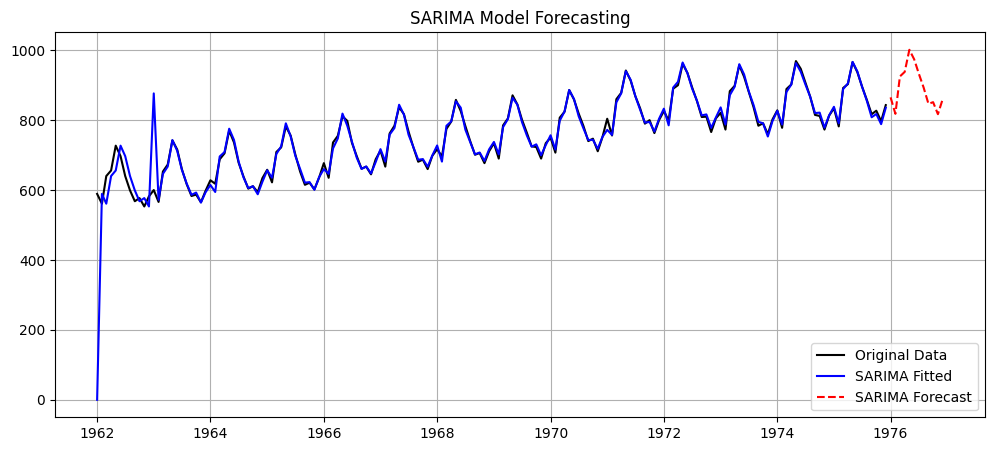

In [172]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model # seasonal Auto regression integreated moving average
sarima=SARIMAX(de['Milk_Production'],
               order=(1,1,1),seasonal_order=(1,1,1,12)).fit()

# Forecast next 12 months
future_sarima=sarima.forecast(12)

# Plot
plt.figure(figsize=(12,5))
plt.plot(de['Milk_Production'],label="Original Data",color="black")
plt.plot(sarima.fittedvalues,label="SARIMA Fitted",color='blue')
plt.plot(future_sarima,label="SARIMA Forecast",color="red",linestyle="dashed")
plt.legend()
plt.title("SARIMA Model Forecasting")
plt.grid()
plt.show()

![pdq](pdq.png)

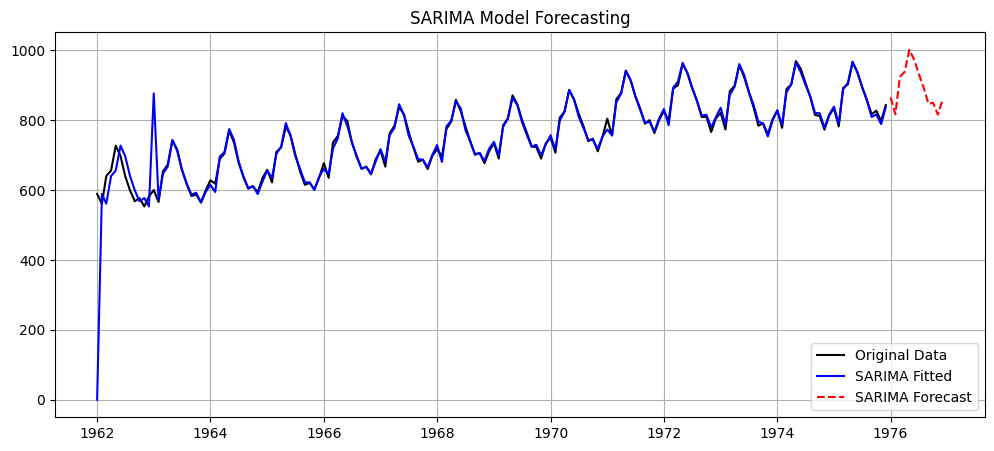

In [174]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model # seasonal Auto regression integreated moving average
sarima=SARIMAX(de['Milk_Production'],
               order=(3,1,3),seasonal_order=(1,1,1,12)).fit()

# Forecast next 12 months
future_sarima=sarima.forecast(12)

# Plot
plt.figure(figsize=(12,5))
plt.plot(de['Milk_Production'],label="Original Data",color="black")
plt.plot(sarima.fittedvalues,label="SARIMA Fitted",color='blue')
plt.plot(future_sarima,label="SARIMA Forecast",color="red",linestyle="dashed")
plt.legend()
plt.title("SARIMA Model Forecasting")
plt.grid()
plt.show()

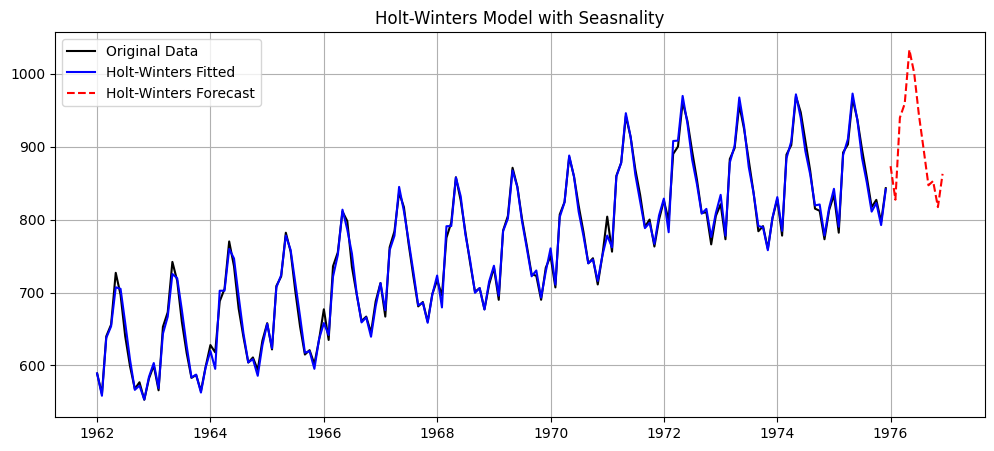

In [175]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#Fitmodel
holt_winters=ExponentialSmoothing(de['Milk_Production'],trend='add',seasonal='mul',seasonal_periods=12).fit()### seasonal =mul because seasonality
#increase with year

#Forecast next 12 months
future_hw=holt_winters.forecast(12)

#plot
plt.figure(figsize=(12,5))
plt.plot(de['Milk_Production'],label="Original Data",color="black")
plt.plot(holt_winters.fittedvalues,label="Holt-Winters Fitted",color="blue")
plt.plot(future_hw,label="Holt-Winters Forecast",color="red",linestyle="dashed")
plt.legend()
plt.title("Holt-Winters Model with Seasnality")
plt.grid()